# PCA with Supervised Algorithms

## Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import seaborn as sns
from matplotlib.pyplot import matplotlib
plt.rcParams["figure.figsize"] = (10,6)

import warnings
warnings.filterwarnings("ignore")

# Veri Kümesinin Özellikleri

- **Örnek Sayısı:** 178
- **Özellik Sayısı:** 13 
  (Her bir özellik, şarapların bir kimyasal özelliklerini temsil eder.)
- **Sınıf Sayısı:** 3 
  (Üç farklı şarap çeşidi.)

## Verideki Özellikler

1. Alkol
2. Malic asit
3. Kül
4. Külün alkalinliği
5. Magnezyum
6. Toplam fenoller
7. Flavanoidler
8. Nonflavanoid fenoller
9. Proanthocyanins
10. Renk yoğunluğu
11. Hue
12. OD280/OD315 of diluted wines
13. Proline


Verinizde belirtilen **"Hue"** terimi, şarap biliminde genellikle şarabın rengini tanımlamak için kullanılır. Şarap bağlamında "Hue" şu şekilde tanımlanabilir:

**Hue (Ton):** Şarabın renginin özelliğini ifade eder. Özellikle kırmızı şaraplarda, yaşlandıkça rengin tonu turuncudan mora doğru değişir. Genç kırmızı şaraplar parlak kırmızı veya mor tonlarda olabilirken, yaşlanmış şaraplar tuğla ya da kahverengi tonlarda olabilir. Hue, bu renk değişikliklerini ölçmek için kullanılır.

In [2]:
df = pd.read_csv("Wine.csv")

In [3]:
df.head()

Alcohol  Malic_Acid   Ash  Ash_Alcanity  Magnesium  Total_Phenols  \
0    14.23        1.71  2.43          15.6        127           2.80   
1    13.20        1.78  2.14          11.2        100           2.65   
2    13.16        2.36  2.67          18.6        101           2.80   
3    14.37        1.95  2.50          16.8        113           3.85   
4    13.24        2.59  2.87          21.0        118           2.80   

   Flavanoids  Nonflavanoid_Phenols  Proanthocyanins  Color_Intensity   Hue  \
0        3.06                  0.28             2.29             5.64  1.04   
1        2.76                  0.26             1.28             4.38  1.05   
2        3.24                  0.30             2.81             5.68  1.03   
3        3.49                  0.24             2.18             7.80  0.86   
4        2.69                  0.39             1.82             4.32  1.04   

   OD280  Proline  Customer_Segment  
0   3.92     1065                 1  
1   3.40     1050                 1  
2   3.17     1185                 1  
3   3.45     1480                 1  
4   2.93      735                 1

In [4]:
df.shape

(178, 14)

In [5]:
df.Customer_Segment.unique()

array([1, 2, 3], dtype=int64)

In [6]:
df.Customer_Segment.value_counts()

2    71
1    59
3    48
Name: Customer_Segment, dtype: int64

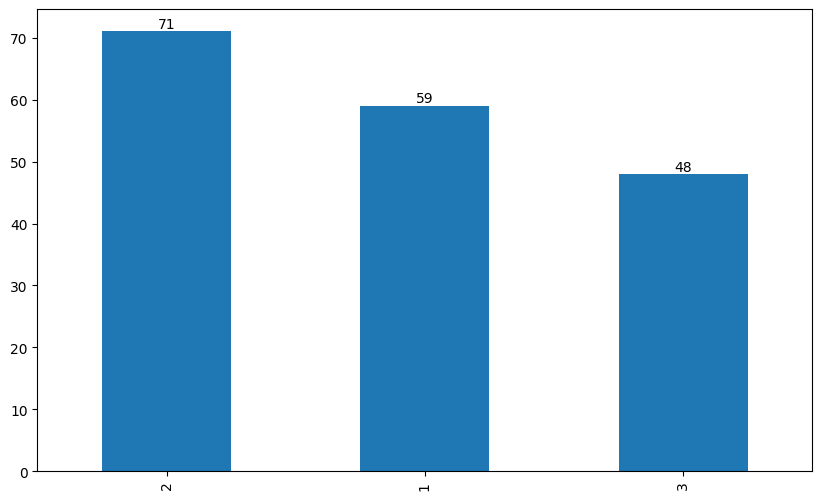

In [7]:
ax = df.Customer_Segment.value_counts().plot.bar()
ax.bar_label(ax.containers[0]);

In [8]:
df.describe()

Alcohol  Malic_Acid         Ash  Ash_Alcanity   Magnesium  \
count  178.000000  178.000000  178.000000    178.000000  178.000000   
mean    13.000618    2.336348    2.366517     19.494944   99.741573   
std      0.811827    1.117146    0.274344      3.339564   14.282484   
min     11.030000    0.740000    1.360000     10.600000   70.000000   
25%     12.362500    1.602500    2.210000     17.200000   88.000000   
50%     13.050000    1.865000    2.360000     19.500000   98.000000   
75%     13.677500    3.082500    2.557500     21.500000  107.000000   
max     14.830000    5.800000    3.230000     30.000000  162.000000   

       Total_Phenols  Flavanoids  Nonflavanoid_Phenols  Proanthocyanins  \
count     178.000000  178.000000            178.000000       178.000000   
mean        2.295112    2.029270              0.361854         1.590899   
std         0.625851    0.998859              0.124453         0.572359   
min         0.980000    0.340000              0.130000         0.410000   
25%         1.742500    1.205000              0.270000         1.250000   
50%         2.355000    2.135000              0.340000         1.555000   
75%         2.800000    2.875000              0.437500         1.950000   
max         3.880000    5.080000              0.660000         3.580000   

       Color_Intensity         Hue       OD280      Proline  Customer_Segment  
count       178.000000  178.000000  178.000000   178.000000        178.000000  
mean          5.058090    0.957449    2.611685   746.893258          1.938202  
std           2.318286    0.228572    0.709990   314.907474          0.775035  
min           1.280000    0.480000    1.270000   278.000000          1.000000  
25%           3.220000    0.782500    1.937500   500.500000          1.000000  
50%           4.690000    0.965000    2.780000   673.500000          2.000000  
75%           6.200000    1.120000    3.170000   985.000000          3.000000  
max          13.000000    1.710000    4.000000  1680.000000          3.000000

<AxesSubplot:>

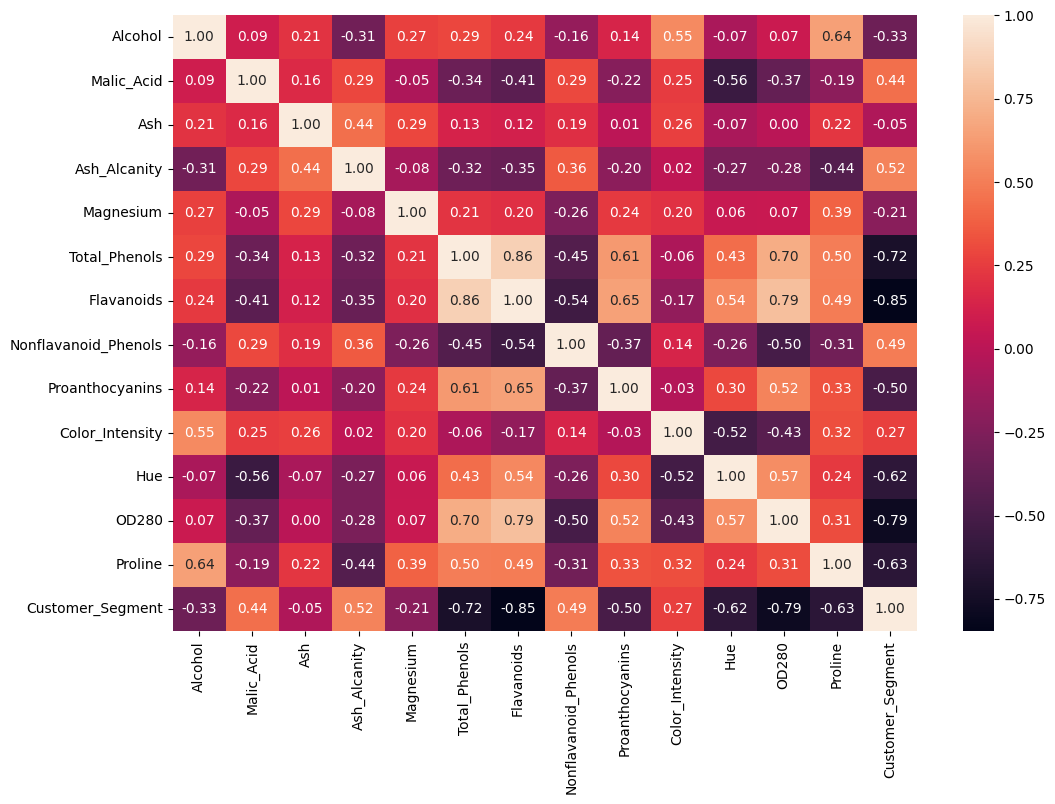

In [9]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), annot = True, fmt=".2f")

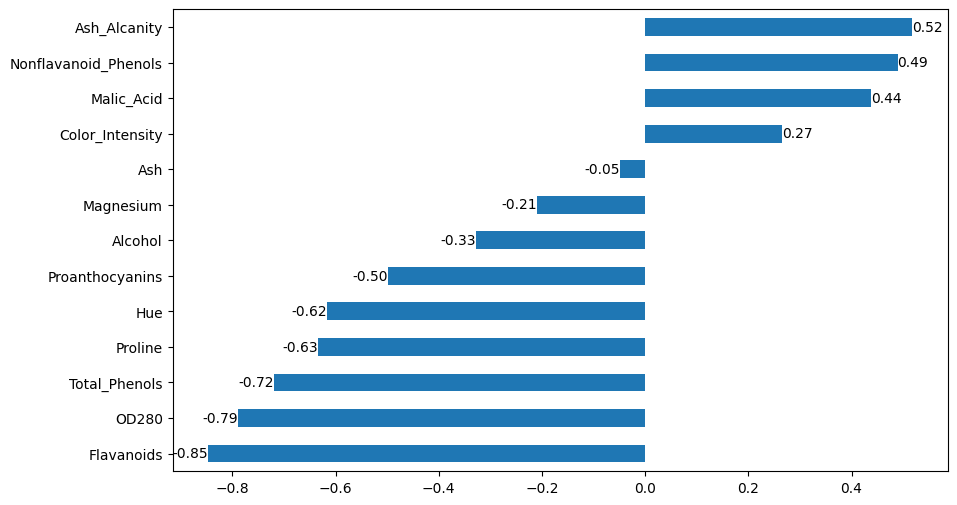

In [10]:
ax = df.corr()["Customer_Segment"][:-1].sort_values().plot(kind="barh")
ax.bar_label(ax.containers[0], fmt="%.2f");

In [11]:
df.isnull().sum().any()

False

## Split the Data

In [12]:
X = df.drop("Customer_Segment", axis = 1)

In [13]:
y = df["Customer_Segment"]

In [14]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size = 0.2, 
                                                    stratify=y, 
                                                    random_state = 0)

## Modeling with Random Forest

In [15]:
from sklearn.metrics import confusion_matrix, classification_report

In [16]:
def eval_metric(model, X_train, y_train, X_test, y_test):
    y_train_pred = model.predict(X_train)
    y_pred = model.predict(X_test)
    
    print("Test_Set")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print()
    print("Train_Set")
    print(confusion_matrix(y_train, y_train_pred))
    print(classification_report(y_train, y_train_pred))

In [17]:
from sklearn.ensemble import RandomForestClassifier

In [18]:
classifier = RandomForestClassifier(random_state = 0)
classifier.fit(X_train, y_train)
eval_metric(classifier, X_train, y_train, X_test, y_test)

Test_Set
[[12  0  0]
 [ 0 14  0]
 [ 0  0 10]]
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        12
           2       1.00      1.00      1.00        14
           3       1.00      1.00      1.00        10

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36


Train_Set
[[47  0  0]
 [ 0 57  0]
 [ 0  0 38]]
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        47
           2       1.00      1.00      1.00        57
           3       1.00      1.00      1.00        38

    accuracy                           1.00       142
   macro avg       1.00      1.00      1.00       142
weighted avg       1.00      1.00      1.00       142



In [19]:
from sklearn.model_selection import cross_validate

model = RandomForestClassifier(random_state = 0)

scores = cross_validate(model, X_train, y_train, scoring = ['accuracy', 'precision_micro','recall_micro','f1_micro'], cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_accuracy           0.971905
test_precision_micro    0.971905
test_recall_micro       0.971905
test_f1_micro           0.971905
dtype: float64

In [20]:
classifier.feature_importances_

array([0.12930939, 0.02858818, 0.01005337, 0.02107876, 0.02670528,
       0.04826478, 0.17041694, 0.01237242, 0.01801449, 0.17606478,
       0.06869346, 0.09987653, 0.19056163])

In [21]:
feats = pd.DataFrame(index=df.iloc[:,:-1].columns, data= classifier.feature_importances_, 
                     columns=['Importance'])
imp_feats = feats.sort_values("Importance")
imp_feats

Importance
Ash                     0.010053
Nonflavanoid_Phenols    0.012372
Proanthocyanins         0.018014
Ash_Alcanity            0.021079
Magnesium               0.026705
Malic_Acid              0.028588
Total_Phenols           0.048265
Hue                     0.068693
OD280                   0.099877
Alcohol                 0.129309
Flavanoids              0.170417
Color_Intensity         0.176065
Proline                 0.190562

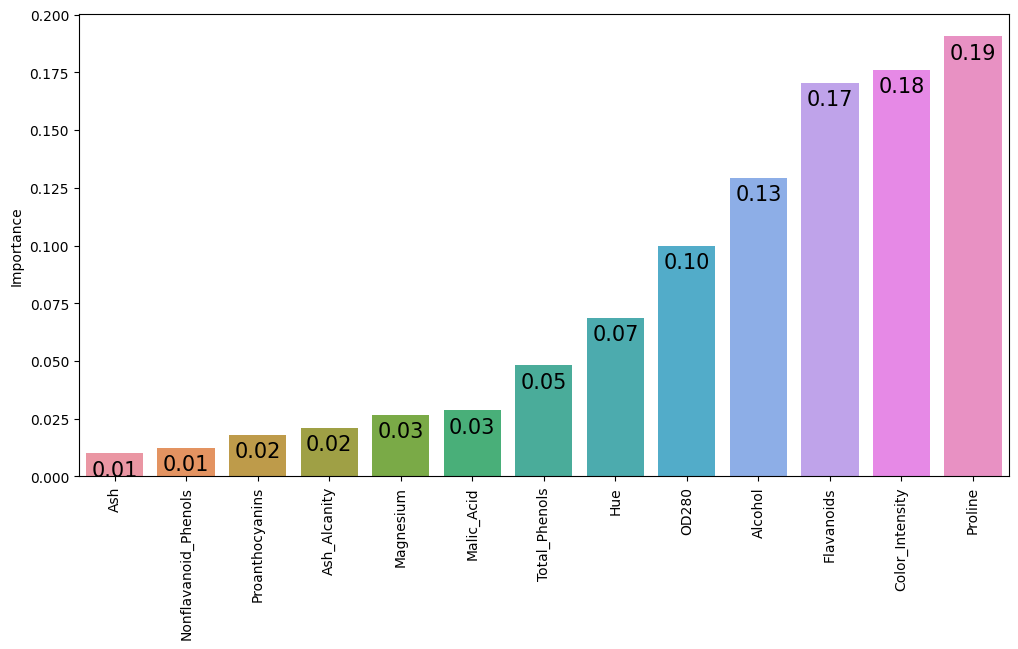

In [22]:
plt.figure(figsize=(12,6))
splot = sns.barplot(data=imp_feats.sort_values('Importance'),x=imp_feats.sort_values('Importance').index,y='Importance')
plt.xticks(rotation=90)
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.2f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   size=15,
                   xytext = (0, -12), 
                   textcoords = 'offset points')

## Re-Modelling by feature importance

In [23]:
X2 = df[["Proline", "Color_Intensity", "Flavanoids"]]

In [24]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2,
                                                        y,
                                                        test_size = 0.2, 
                                                        stratify=y, 
                                                        random_state = 0)

In [25]:
classifier2 = RandomForestClassifier(random_state = 0)
classifier2.fit(X_train2, y_train2)
eval_metric(classifier2, X_train2, y_train2, X_test2, y_test2)

Test_Set
[[12  0  0]
 [ 0 14  0]
 [ 0  1  9]]
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        12
           2       0.93      1.00      0.97        14
           3       1.00      0.90      0.95        10

    accuracy                           0.97        36
   macro avg       0.98      0.97      0.97        36
weighted avg       0.97      0.97      0.97        36


Train_Set
[[47  0  0]
 [ 0 57  0]
 [ 0  0 38]]
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        47
           2       1.00      1.00      1.00        57
           3       1.00      1.00      1.00        38

    accuracy                           1.00       142
   macro avg       1.00      1.00      1.00       142
weighted avg       1.00      1.00      1.00       142



In [26]:
model = RandomForestClassifier(random_state = 0)

scores = cross_validate(model, X_train2, y_train2, scoring = ['accuracy', 'precision_micro','recall_micro','f1_micro'], cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_accuracy           0.957619
test_precision_micro    0.957619
test_recall_micro       0.957619
test_f1_micro           0.957619
dtype: float64

## PCA

## Scaling Data

In [27]:
from sklearn.preprocessing import StandardScaler

In [28]:
scaler = StandardScaler()

In [29]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

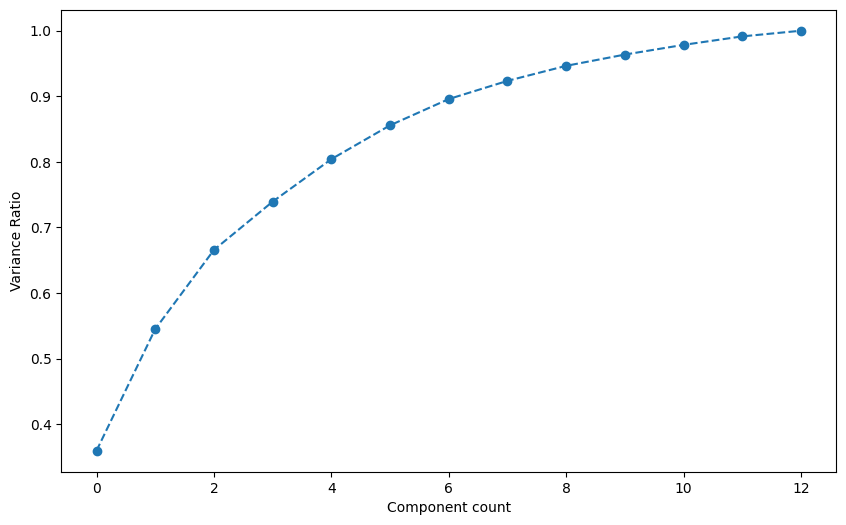

In [48]:
from sklearn.decomposition import PCA
pca = PCA().fit(X_train_scaled)
x = range(1,14)
plt.plot(np.cumsum(pca.explained_variance_ratio_), "--o")
plt.xlabel("Component count")
plt.ylabel("Variance Ratio");

In [31]:
pca = PCA(n_components=13).fit(X_train_scaled)

In [32]:
my_dict = {"explained_variance":pca.explained_variance_, 
           "explained_variance_ratio":pca.explained_variance_ratio_,
           "cumsum_explained_variance_ratio":pca.explained_variance_ratio_.cumsum()}

In [33]:
df_ev = pd.DataFrame(my_dict, index = range(1,14))
df_ev

explained_variance  explained_variance_ratio  \
1             4.706713                  0.359505   
2             2.428244                  0.185473   
3             1.580507                  0.120721   
4             0.964060                  0.073636   
5             0.848632                  0.064820   
6             0.675462                  0.051593   
7             0.524426                  0.040056   
8             0.363173                  0.027740   
9             0.300204                  0.022930   
10            0.224731                  0.017165   
11            0.193896                  0.014810   
12            0.169263                  0.012929   
13            0.112887                  0.008622   

    cumsum_explained_variance_ratio  
1                          0.359505  
2                          0.544978  
3                          0.665699  
4                          0.739335  
5                          0.804155  
6                          0.855748  
7                          0.895804  
8                          0.923544  
9                          0.946474  
10                         0.963639  
11                         0.978449  
12                         0.991378  
13                         1.000000

In [49]:
pca = PCA(n_components = 0.75) # 0.75

# 2 ve 3 component görselleştirmeyi kolaylaştırır
# varyansı uhafaza ederken component'i artırmadan...


In [50]:
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

In [51]:
df_pca_train = pd.DataFrame(X_train_pca)
df_pca_train = df_pca_train.rename(columns={0:"first_component", 
                                            1:"second_component", 
                                            2:"third_component"})
df_pca_train.head()

first_component  second_component  third_component         3         4
0        -0.783937         -1.590432         0.568115  0.039495  1.177684
1        -1.792083          0.583400        -1.321347 -0.527003 -0.970855
2         2.101051          2.109598         0.790712 -0.591235  0.245845
3         3.107242          0.448619        -1.057832  0.473768 -1.028770
4         0.725718         -2.107998         0.588435 -0.829437 -0.875271

In [52]:
df_pca_test=pd.DataFrame(X_test_pca)
df_pca_test = df_pca_test.rename(columns={0:"first_component", 1:"second_component", 2:"third_component"})
df_pca_test.head()

first_component  second_component  third_component         3         4
0         0.510682         -1.703429         0.476175 -1.935205 -1.101090
1        -1.431099          0.675556         0.335034 -1.090338 -0.626457
2         1.517576         -1.098461        -1.110562 -2.012130 -2.073938
3        -2.504356          1.651059        -0.292180  0.493889  1.777906
4        -0.335949         -2.097911        -2.503081 -0.218857  0.088462

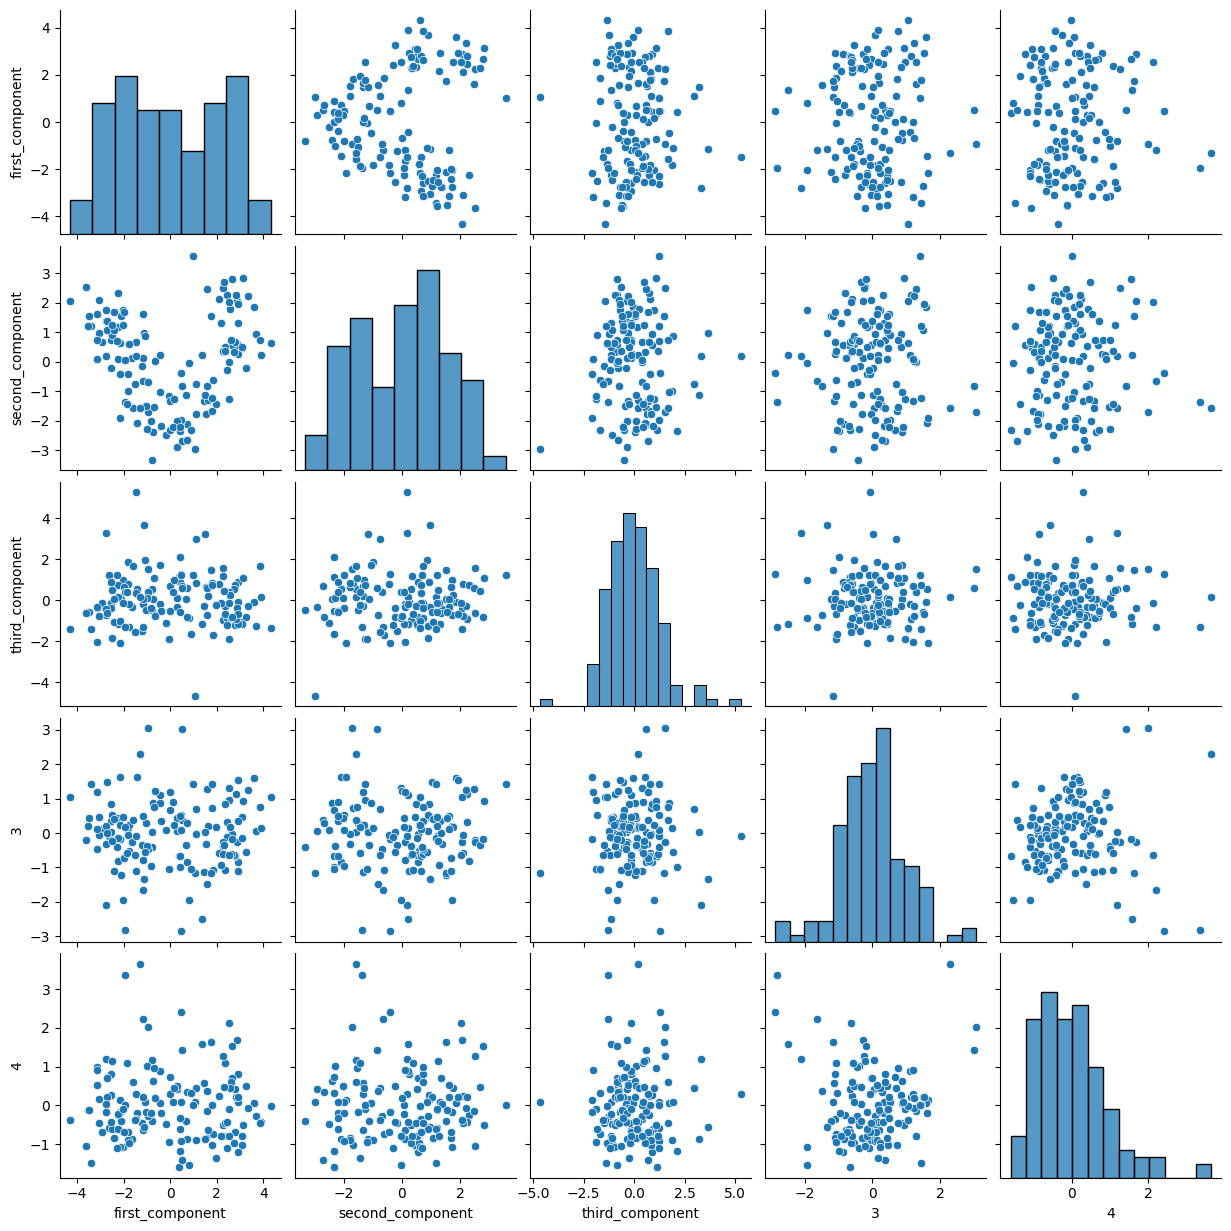

In [53]:
sns.pairplot(df_pca_train)

In [54]:
df_pca_train.corr().round()

first_component  second_component  third_component    3    4
first_component               1.0               0.0              0.0 -0.0 -0.0
second_component              0.0               1.0              0.0 -0.0 -0.0
third_component               0.0               0.0              1.0 -0.0 -0.0
3                            -0.0              -0.0             -0.0  1.0  0.0
4                            -0.0              -0.0             -0.0  0.0  1.0

## Modelling after PCA

In [63]:
classifier3 = RandomForestClassifier(random_state = 0,
                                     max_depth=3)

classifier3.fit(X_train_pca, y_train)

eval_metric(classifier3, X_train_pca, y_train, X_test_pca, y_test)

Test_Set
[[11  1  0]
 [ 1 13  0]
 [ 0  0 10]]
              precision    recall  f1-score   support

           1       0.92      0.92      0.92        12
           2       0.93      0.93      0.93        14
           3       1.00      1.00      1.00        10

    accuracy                           0.94        36
   macro avg       0.95      0.95      0.95        36
weighted avg       0.94      0.94      0.94        36


Train_Set
[[47  0  0]
 [ 2 54  1]
 [ 0  0 38]]
              precision    recall  f1-score   support

           1       0.96      1.00      0.98        47
           2       1.00      0.95      0.97        57
           3       0.97      1.00      0.99        38

    accuracy                           0.98       142
   macro avg       0.98      0.98      0.98       142
weighted avg       0.98      0.98      0.98       142



In [56]:
from sklearn.pipeline import Pipeline

In [64]:
operations = [("scaler", StandardScaler()), ("PCA",PCA(n_components=3)),
              ("RF", RandomForestClassifier(random_state = 0,
                                           max_depth=3))]

pipe_model = Pipeline(steps=operations)
                                             
scores = cross_validate(pipe_model, X_train, y_train, scoring = ['accuracy', 
                                                                 'precision_micro',
                                                                 'recall_micro',
                                                                 'f1_micro'], 
                        cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]                                            

test_accuracy           0.964286
test_precision_micro    0.964286
test_recall_micro       0.964286
test_f1_micro           0.964286
dtype: float64

## Interpreting PCA results

In [58]:
scaled_df = pd.DataFrame(X_train_scaled, 
                         columns = df.columns[:-1])

In [59]:
combined_df = pd.concat([df_pca_train, scaled_df], axis=1)
correlation = combined_df.corr()
correlation.head()

first_component  second_component  third_component  \
first_component      1.000000e+00      1.968080e-16     1.942894e-16   
second_component     1.968080e-16      1.000000e+00     1.109317e-16   
third_component      1.942894e-16      1.109317e-16     1.000000e+00   
3                   -1.704045e-16     -3.911168e-17    -3.954873e-17   
4                   -1.581824e-16     -3.291066e-17    -1.235685e-16   

                             3             4   Alcohol  Malic_Acid       Ash  \
first_component  -1.704045e-16 -1.581824e-16 -0.315917    0.522374 -0.041560   
second_component -3.911168e-17 -3.291066e-17  0.759174    0.314529  0.481679   
third_component  -3.954873e-17 -1.235685e-16 -0.250287    0.138850  0.764486   
3                 1.000000e+00  5.316709e-16  0.093291    0.465455 -0.145065   
4                 5.316709e-16  1.000000e+00 -0.266279    0.198191 -0.211234   

                  Ash_Alcanity  Magnesium  Total_Phenols  Flavanoids  \
first_component       0.457484  -0.297626      -0.858881   -0.910155   
second_component     -0.033691   0.471424       0.089916   -0.016412   
third_component       0.798863   0.165145       0.186767    0.187314   
3                    -0.046915  -0.570917       0.226544    0.188140   
4                     0.019979   0.452140      -0.001603   -0.022635   

                  Nonflavanoid_Phenols  Proanthocyanins  Color_Intensity  \
first_component               0.647516        -0.661573         0.157077   
second_component              0.122430         0.060781         0.847400   
third_component               0.162821         0.177221        -0.138940   
3                             0.137411         0.385214         0.105288   
4                            -0.479420         0.306280         0.048514   

                       Hue     OD280   Proline  
first_component  -0.703526 -0.796406 -0.651453  
second_component -0.340077 -0.332120  0.556237  
third_component   0.042489  0.218051 -0.202532  
3                -0.277709  0.160339 -0.121741  
4                -0.339999 -0.059416 -0.193321

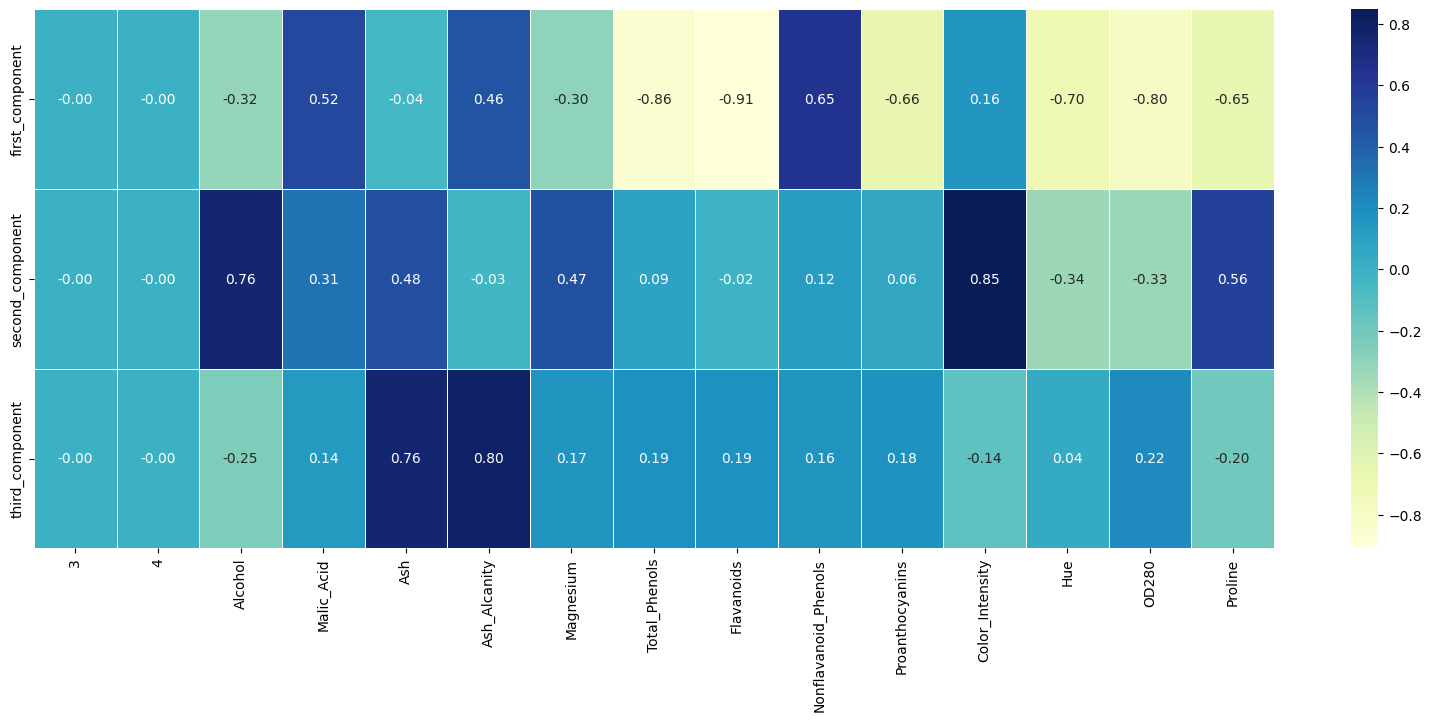

In [60]:
fig, ax = plt.subplots(figsize=(20, 7))
sns.heatmap(correlation.iloc[:3,3:], 
            cmap='YlGnBu', 
            linewidths=.7, 
            annot=True, 
            fmt='.2f')
plt.show()

<AxesSubplot:>

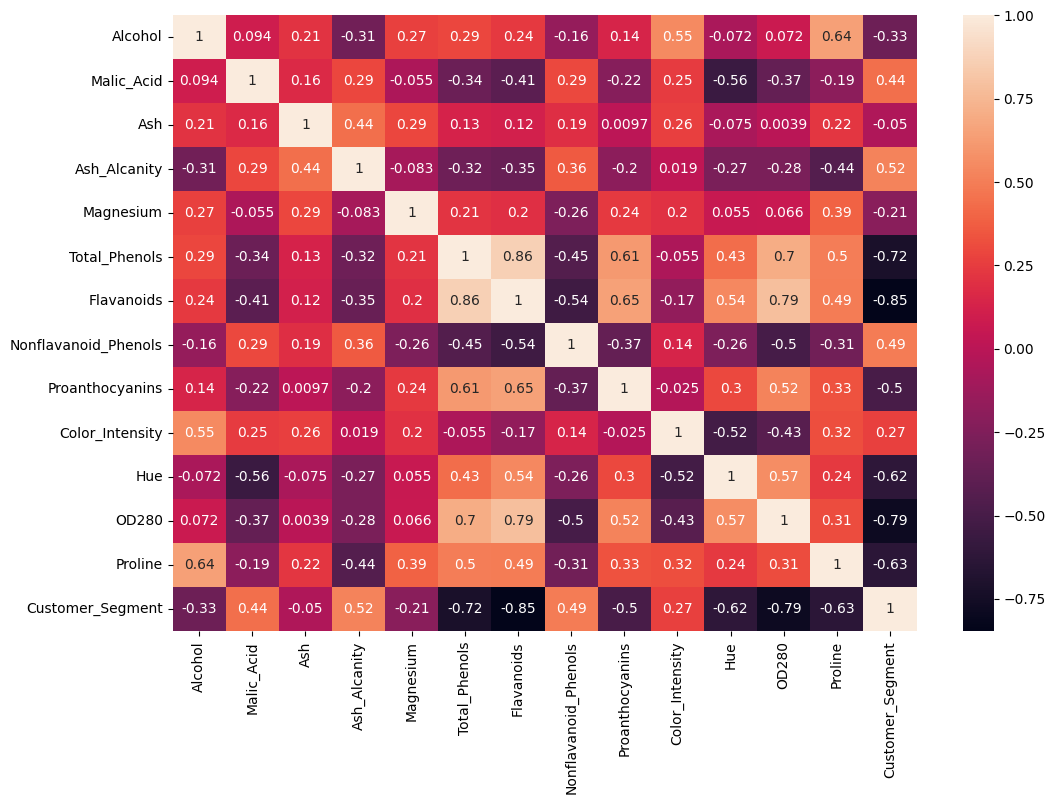

In [46]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), annot = True)

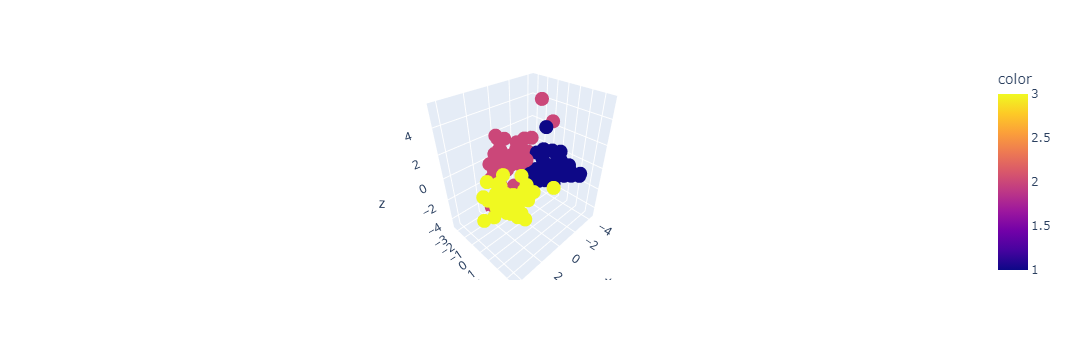

In [47]:
import plotly.express as px
fig = px.scatter_3d(x=df_pca_train["first_component"], y=df_pca_train["second_component"], 
                    z=df_pca_train["third_component"], color=y_train)
fig.show()